In [ ]:
import pandas as pd
t = pd.read_csv("titanic.csv")

print(t["Age"].sum())
print(t["Age"].max())
print(t["Age"].min())
print(t.describe())
print(t.dtypes)
print("------------------------")

data = ['Kim', 'Park', 'Lee', 'Choi']
ser = pd.Series(data)  # Series는 인덱스값을 같이 저장하는 데이터
print(ser)
print("------------------------")


data2 = {'Name': ['Kim', 'Park', 'Lee', 'Choi'],
         'Age': [20, 23, 21, 26]}
df = pd.DataFrame(data2, index=["학번 1","학번 2","학번 3","학번 4"])
print(df)



In [ ]:
titanic = pd.read_csv("titanic.csv", index_col=0)
print(titanic)
print("-----------------------")
print(titanic.head()) # default = 5
print("-----------------------")
print(titanic.tail())

In [ ]:
import numpy as np
#titanic.to_excel("titanic.xlsx") # 엑셀로 저장하기
df = pd.DataFrame(np.random.randint(0,100,size=(5,4)),columns=list('ABCD'))
print(df)

In [ ]:
import pandas as pd
'''
countrie = pd.read_csv("countries.csv")

print(countrie)
print("--------------------------------")


data = {
        'code': ['KR', 'US', 'JP', 'CN', 'RU'],

        'country': ['Korea', 'USA', 'Japan', 'China', 'Russia'],

        'area': [9480, 9629091, 377835, 9596960, 17100000],

        'capital': ['Seoul', 'Washington', 'Tokyo', 'Beijing', 'Moscow'],

        'population': [48422644, 310232863, 127288000, 1330044000, 14070200]


        }

df = pd.DataFrame(data)
'''
# 새로운 열 추가하기
countries = pd.read_csv('countries.csv')

countries['destiny'] = countries['population'] / countries['area']

print(countries)
print("↑열추가----↓행추가---------------------")
df = pd.DataFrame({
    "code": ["CA"],
    "country": ["Canada"],
    "area": [9984670],
    "capital": ["Ottawa"],
    "population": 34300000
})
# 행 추가하기
df2 = pd.concat([countries, df], ignore_index=True)
print(df2)

# 행 삭제하기
# inplace = True (저장함)
# inplace = False (저장 안 함)
print("행 삭제하기")
print("inplace X OR inplace = False -------------------------------")
df3 = countries.drop(index=2, axis=0, inplace=False)
print(countries)
print("inplace True -------------------------------")
df4 = countries.drop(index=2, axis=0, inplace=True)
print(countries)

# 열 삭제하기
print("열 삭제하기")
print("inplace X OR inplace = False -------------------------------")
df5 = countries.drop(["area"], axis=1, inplace=False)
print(countries)
print("inplace True -------------------------------")
df6 = countries.drop(["area"], axis=1, inplace=True)
print(countries)


In [ ]:
# below_20 = titanic[titanic["Age"] < 20]
# below_20.head()

# print(titanic[titanic["Pclass"].isin([1,2])]) # isin 함수는 값이 포함된 열만 출력

# print(titanic.loc[titanic["Age"]<20,["Name", "Age"]]) # 20세 미만의 승객 이름만 추출

# print(titanic.iloc[20:23, 4:6])
# 행범위 #열범위
print(t.sort_values(by=["Pclass", "Age"],ascending=False).head()) #ascending=False -> 내림차순 정렬


In [ ]:
import pandas as pd
t = pd.read_csv("titanic.csv")
# t[['Sex','Age']]
# t[['Sex','Age']].groupby("Sex").mean()

df = pd.DataFrame(t[['Sex','Age']].groupby("Sex").mean())
df

df2 = t.groupby(["Sex","Pclass"])["Fare"].mean()
df2

df3 = t["Pclass"].value_counts()
df3



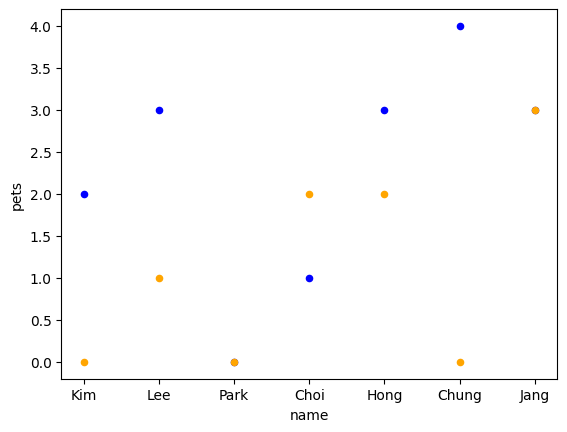

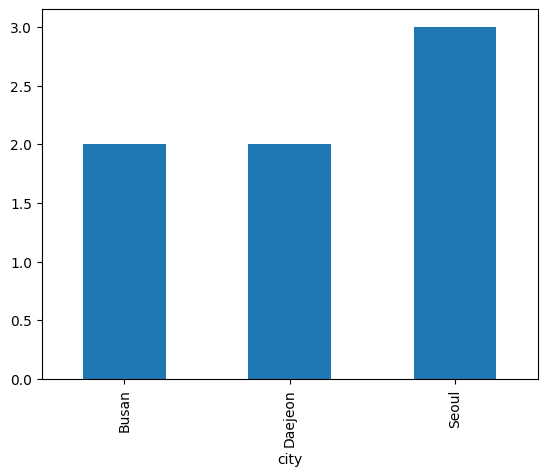

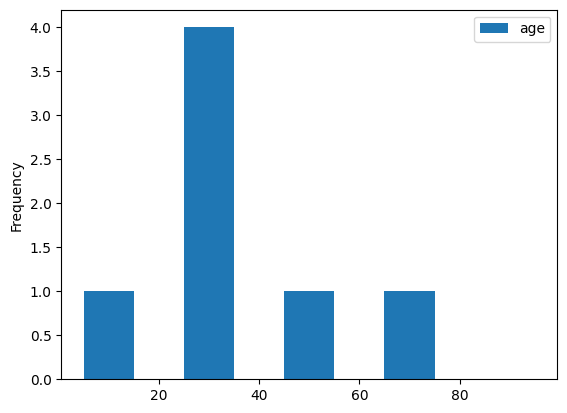

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'name': ['Kim', 'Lee', 'Park', 'Choi', 'Hong', 'Chung', 'Jang'],
    'age': [22, 26, 78, 17, 46, 32, 21],
    'city': ['Seoul', 'Busan', 'Seoul', 'Busan', 'Seoul', 'Daejeon', 'Daejeon'],
    'children': [2, 3, 0, 1, 3, 4, 3],
    'pets': [0, 1, 0, 2, 2, 0, 3],

})

ax = plt.gca()

df.plot(kind='scatter', x='name', y='children', color='blue', ax=ax)
df.plot(kind='scatter', x='name',y='pets',color='orange',ax=ax)

plt.show()

df.groupby('city')['name'].nunique().plot(kind='bar')
plt.show()

df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.5) # bins = y 축 값 정하기, rwidth = 그래프 넓이? 정하기
plt.show()

In [191]:
import pandas as pd
t = pd.read_csv("titanic.csv")

table = pd.pivot_table(t, index=['Sex', 'Pclass'],
                       aggfunc={'Age': 'mean', 'Survived': 'sum'})
#table.plot(kind='bar')

table2 = pd.pivot_table(t, index=['Sex'],
                        columns=['Pclass'], values=['Survived'], aggfunc='sum')
#table2.plot(kind='bar')

df1 = pd.DataFrame({
    'employee': ['Kim', 'Lee', 'Park', 'Choi'],
    'department': ['Accounting', 'Engineering', 'HR', 'Engineering']
})
df2 = pd.DataFrame({
    'employee': ['Kim', 'Lee', 'Park', 'Choi'],
    'age': [27, 34, 26, 29]
})

df3 = pd.merge(df1, df2)
df3

,employee,department,age
0,Kim,Accounting,27
1,Lee,Engineering,34
2,Park,HR,26
3,Choi,Engineering,29


In [275]:
import pandas as pd
df = pd.read_csv("countries1.csv", index_col=0)

df.dropna() # 하나라도 null 값이 있다면 해당 열 삭제
df.dropna(how='all') # 모든열이 null 값인 열 삭제

df_0 = df.fillna(0) #null 값 보정하기
df_0

,country,area,capital,population
code,,,,
KR,Korea,98480.0,Seoul,48422644
US,USA,9629091.0,Washington,310232863
JP,Japan,377835.0,Tokyo,127288000
CN,China,9596960.0,Beijing,1330044000
RU,Russia,17100000.0,Moscow,140702000
IN,India,0.0,New Delhi,1368737513
